#### About standardization

* The result of standardization (or `Z-score normalization`) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with
* $μ$=0 and $σ$=1

* where `μ` is the `mean` (average) and `σ` is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:

$Z = (x-μ)/σ$

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [24]:
np.random.seed(1)
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 1000),
    'x2': np.random.normal(5, 3, 1000),
    'x3': np.random.normal(-5, 5, 1000)
})
df.head()

,x1,x2,x3
0,3.248691,4.540292,-2.552417
1,-1.223513,-2.297526,-3.806021
2,-1.056344,6.523953,-7.240559
3,-2.145937,4.027903,-8.053975
4,1.730815,0.466770,-15.149725


c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


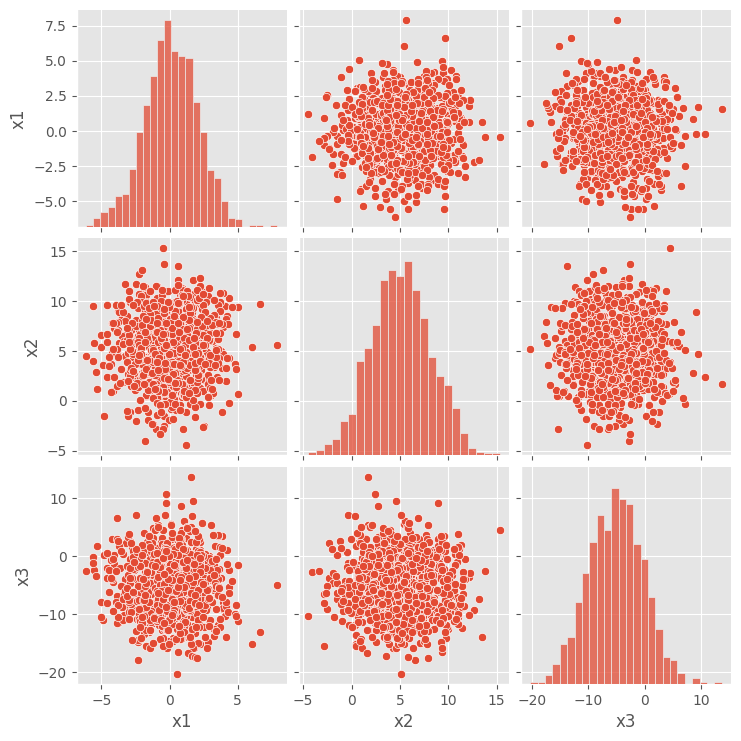

In [25]:
sns.pairplot(df,diag_kind='hist')

In [26]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.61623466, -0.17529616,  0.52662928],
       [-0.66316631, -2.38810153,  0.26858606],
       [-0.57796314,  0.46664216, -0.43838318],
       ...,
       [-0.11053676, -0.92131069, -0.1322437 ],
       [ 0.32115864,  0.6019681 , -1.41809542],
       [-0.23013919,  1.3198551 , -1.31624852]])

In [27]:
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


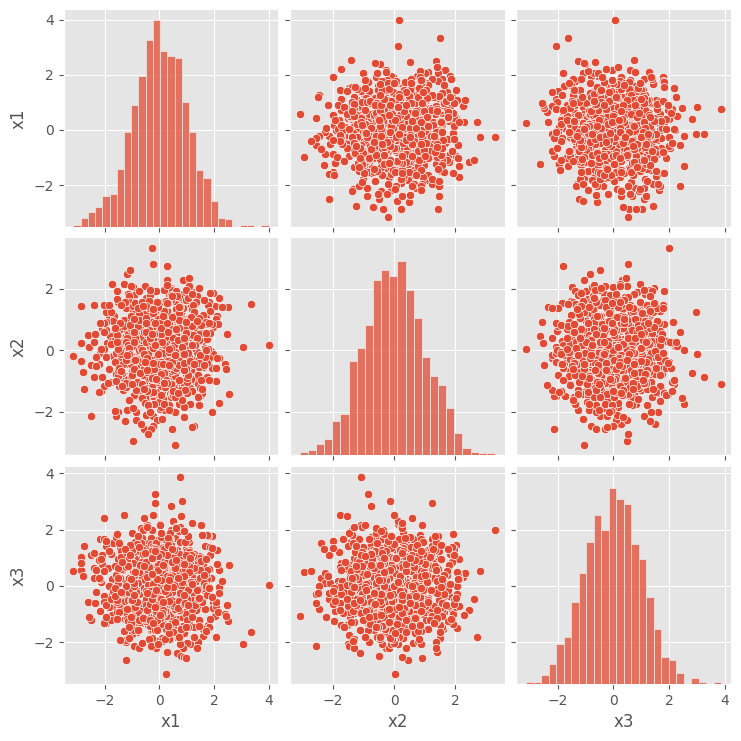

In [28]:
sns.pairplot(scaled_df,diag_kind='hist')

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x500 with 0 Axes>

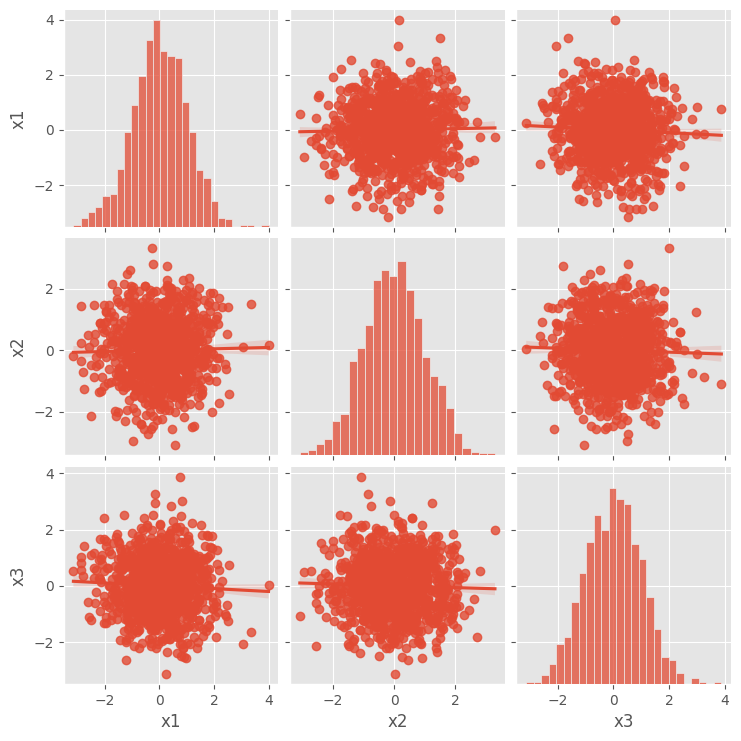

In [29]:
plt.figure(figsize=(15,5))
sns.pairplot(scaled_df,kind='reg')

* We’d also want to think about whether we want to `standardize` or `normalize` (here: scaling to [0, 1] range) our data.
* Some algorithms assume that our data is centered at `0`
* we want to update the model weights `equally.`
* if you want to have features on the same scale since you’d emphasize variables on `larger measurement scales` more.
* I always recommend you to think about the algorithm and what it’s doing, and then it typically becomes obvious whether we want to scale your features or not.

In [49]:
wine_data = pd.read_csv("Data/wine_data.csv",header=None,
     usecols=[0,1,2])
wine_data.columns=['Class label', 'Alcohol', 'Malic acid']

wine_data.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [50]:
wine_data['Class label'].value_counts()

Class label
2    71
1    59
3    48
Name: count, dtype: int64

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


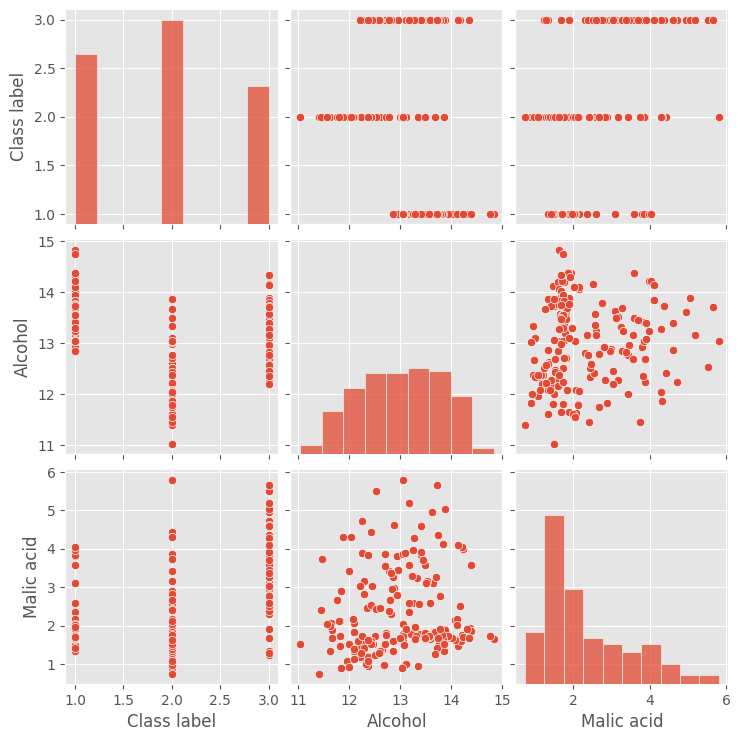

In [34]:
sns.pairplot(wine_data)

In [36]:
std_scale = preprocessing.StandardScaler().fit(wine_data[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(wine_data[['Alcohol', 'Malic acid']])

In [37]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00


In [38]:
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))


Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


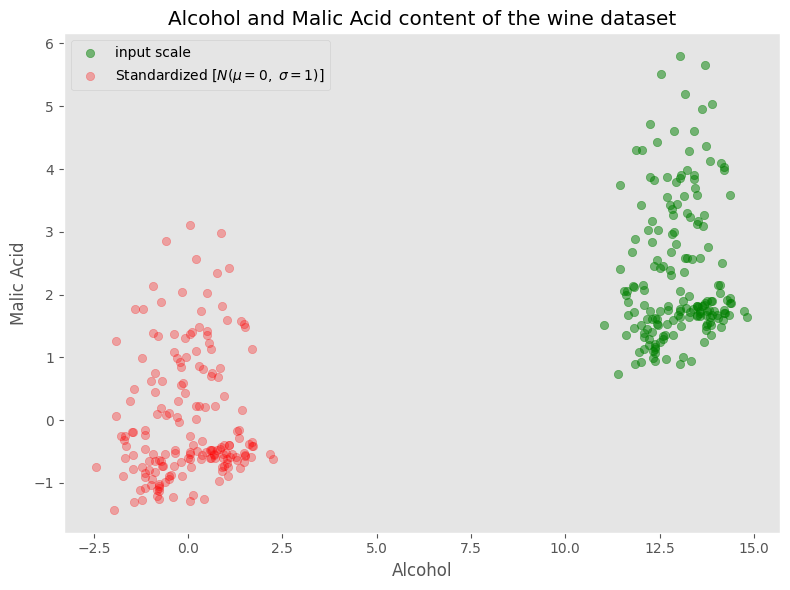

In [41]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(wine_data['Alcohol'], wine_data['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)
    
    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

#### About Min-Max scaling

* An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called "normalization" - a common cause for ambiguities).
* In this approach, the data is scaled to a fixed range - usually 0 to 1.
* The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.
* A Min-Max scaling is typically done via the following equation:

$X _norm$ = $X-X_min$ /$X_max- X_min$

In [43]:
minmax_scale = preprocessing.MinMaxScaler().fit(wine_data[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(wine_data[['Alcohol', 'Malic acid']])

In [44]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


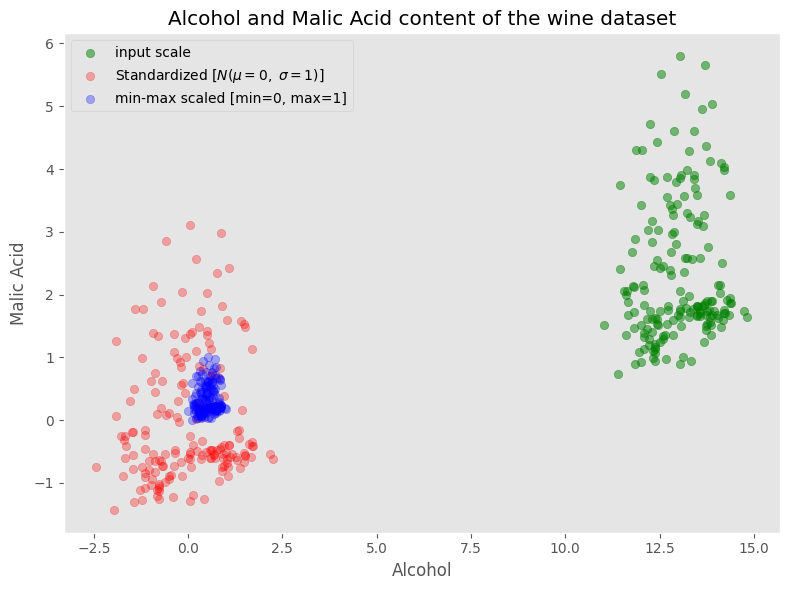

In [45]:
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(wine_data['Alcohol'], wine_data['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    
    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)
    
    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

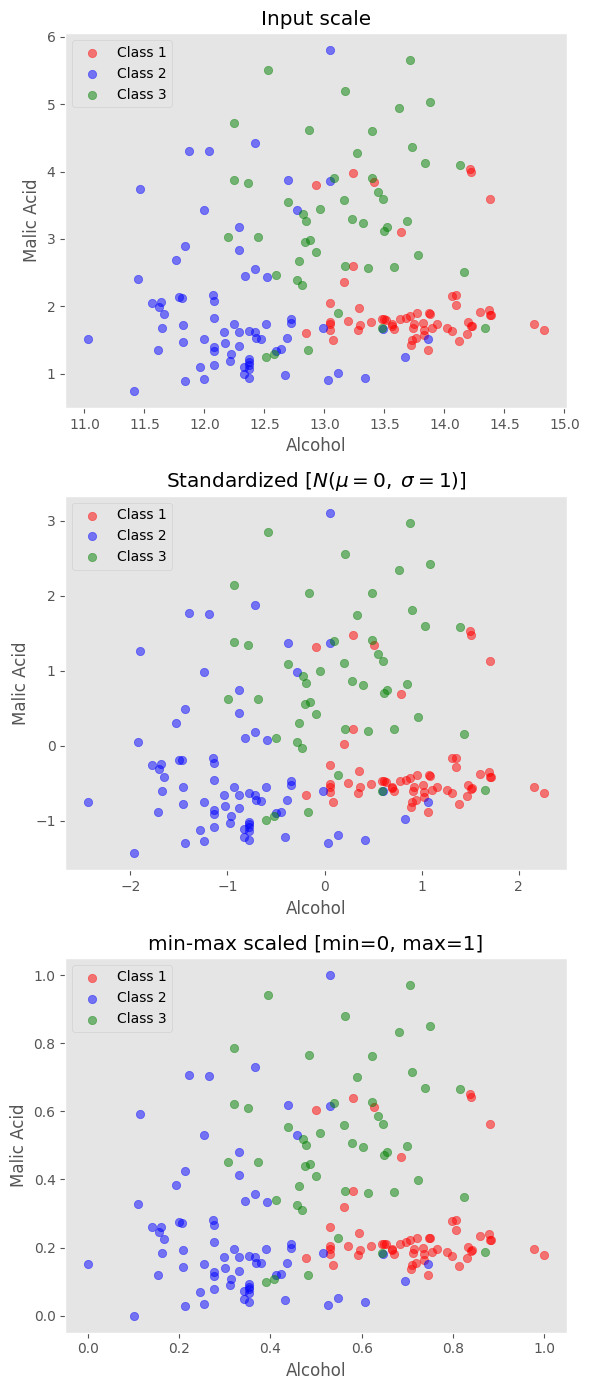

In [48]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)), 
               (wine_data[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale', 
                'Standardized [$N  (\mu=0, \; \sigma=1)$]', 
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[wine_data['Class label'].values == i, 0], 
                  d[wine_data['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
    
plt.tight_layout()

plt.show()
